# 1-D Exploratory Data Analysis

In this notebook, do some EDA in one dimension. Pick a column  (or a set of columns) you're interested in looking at. Calculate some summary statistics (like mean,median,min,max,sd). Then, make some plots to visualize the distribution of the data. Distirbution plots include things like histograms, boxplots, dotplots, beeswarms, and violin plots. Review [ggplot-intro](https://github.com/data4news/ggplot-intro) for examples of these kinds of distribution plots.

### Standard Python and R imports

In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

# My commonly used R imports

require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


## Load the data

In [7]:
%%R -o df
 
# Import data with R
df <- read_csv('combinedwithcensus.csv', show_col_types = FALSE)
df %>% head(4)

# A tibble: 4 × 131
  `Unnamed: 0` Borough   Borough/Citywide Offi…¹ District School `School Name_x`
         <dbl> <chr>     <chr>                      <dbl> <chr>  <chr>          
1            0 Manhattan Manhattan                      1 01M020 P.S. 020 Anna …
2            1 Manhattan Manhattan                      1 01M020 P.S. 020 Anna …
3            2 Manhattan Manhattan                      1 01M020 P.S. 020 Anna …
4            3 Manhattan Manhattan                      1 01M020 P.S. 020 Anna …
# ℹ abbreviated name: ¹​`Borough/Citywide Office (B/CO)`
# ℹ 125 more variables: `School Category` <chr>, Program <chr>, Language <chr>,
#   `Language (Translated)` <chr>, `General/Special Education` <chr>,
#   `Special Education Model` <chr>, fiscal_year <dbl>, system_code <chr>,
#   location_code <chr>, location_name <chr>, BEDS <dbl>,
#   Managed_by_name <chr>, location_type_description <chr>,
#   Location_Category_Description <chr>, Grades_text <chr>, …
# ℹ Use `colnames()` to see all 

In [8]:
import pandas as pd

In [18]:
df.columns.to_list()


['Unnamed: 0',
 'Borough',
 'Borough/Citywide Office (B/CO)',
 'District',
 'School',
 'School Name_x',
 'School Category',
 'Program',
 'Language',
 'Language (Translated)',
 'General/Special Education',
 'Special Education Model',
 'fiscal_year',
 'system_code',
 'location_code',
 'location_name',
 'BEDS',
 'Managed_by_name',
 'location_type_description',
 'Location_Category_Description',
 'Grades_text',
 'Grades_final_text',
 'open_date',
 'Status_descriptions',
 'Primary_building_code',
 'primary_address_line_1',
 'State_code',
 'X_COORDINATE',
 'Y_COORDINATE',
 'LONGITUDE',
 'LATITUDE',
 'Community_district',
 'Council-district',
 'Census_tract',
 'Borough_block_lot',
 'NTA',
 'NTA_Name',
 'Principal_Name',
 'Principal_title',
 'Principal_phone_number',
 'fax_number',
 'Geographical_District_code',
 'Administrative_District_Code',
 'Administrative_District_Name',
 'community_school_sup_name',
 'Tier_3_Support_Location_Name',
 'Tier_3_Support_Leader_Name',
 'Tier_2_Support_Location

In [35]:
df['percent_white_nonhispanic_estimate'] = df['white_nonhispanic_estimate']/df['total_estimate']
df['percent_white_nonhispanic_estimate']

1       0.566971
2       0.566971
3       0.566971
4       0.566971
5       0.566971
          ...   
2747    0.000000
2748    0.000000
2749    0.000000
2750    0.000000
2751    0.000000
Name: percent_white_nonhispanic_estimate, Length: 2751, dtype: float64

In [39]:
df['percent_black_nonhispanic_estimate'] = df['black_nonhispanic_estimate']/df['total_estimate']
df['percent_black_nonhispanic_estimate']

1       0.063475
2       0.063475
3       0.063475
4       0.063475
5       0.063475
          ...   
2747    0.439983
2748    0.439983
2749    0.439983
2750    0.439983
2751    0.439983
Name: percent_black_nonhispanic_estimate, Length: 2751, dtype: float64

In [40]:
df['percent_native_nonhispanic_estimate'] = df['native_nonhispanic_estimate']/df['total_estimate']
df['percent_native_nonhispanic_estimate']

1       0.000000
2       0.000000
3       0.000000
4       0.000000
5       0.000000
          ...   
2747    0.001091
2748    0.001091
2749    0.001091
2750    0.001091
2751    0.001091
Name: percent_native_nonhispanic_estimate, Length: 2751, dtype: float64

In [49]:
df['percent_asian_nonhispanic_estimate'] = df['asian_nonhispanic_estimate']/df['total_estimate']
df['percent_asian_nonhispanic_estimate']

1       0.158150
2       0.158150
3       0.158150
4       0.158150
5       0.158150
          ...   
2747    0.005456
2748    0.005456
2749    0.005456
2750    0.005456
2751    0.005456
Name: percent_asian_nonhispanic_estimate, Length: 2751, dtype: float64

In [50]:
df['percent_someother_nonhispanic_estimate'] = df['someother_nonhispanic_estimate']/df['total_estimate']
df['percent_someother_nonhispanic_estimate']

1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
       ... 
2747    0.0
2748    0.0
2749    0.0
2750    0.0
2751    0.0
Name: percent_someother_nonhispanic_estimate, Length: 2751, dtype: float64

In [51]:
df['percent_two_or_more_nonhispanic_estimate'] = df['two_or_more_nonhispanic_estimate']/df['total_estimate']
df['percent_two_or_more_nonhispanic_estimate']

1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
       ... 
2747    0.0
2748    0.0
2749    0.0
2750    0.0
2751    0.0
Name: percent_two_or_more_nonhispanic_estimate, Length: 2751, dtype: float64

In [52]:
df['percent_hispanic_estimate'] = df['hispanic_estimate']/df['total_estimate']
df['percent_hispanic_estimate']

1       0.207907
2       0.207907
3       0.207907
4       0.207907
5       0.207907
          ...   
2747    0.553470
2748    0.553470
2749    0.553470
2750    0.553470
2751    0.553470
Name: percent_hispanic_estimate, Length: 2751, dtype: float64

In [53]:
df

,Unnamed: 0,Borough,Borough/Citywide Office (B/CO),District,School,School Name_x,School Category,Program,Language,Language (Translated),...,someother_nonhispanic_estimate,two_or_more_nonhispanic_estimate,hispanic_estimate,percent_white_nonhispanic_estimate,percent_black_nonhispanic_estimate,percent_native_nonhispanic_estimate,percent_asian_nonhispanic_estimate,percent_someother_nonhispanic_estimate,percent_two_or_more_nonhispanic_estimate,percent_hispanic_estimate
1,0.0,Manhattan,Manhattan,1.0,01M020,P.S. 020 Anna Silver,Elementary,Dual Language,Chinese,中文,...,0.0,0.0,773.0,0.566971,0.063475,0.000000,0.158150,0.0,0.0,0.207907
2,1.0,Manhattan,Manhattan,1.0,01M020,P.S. 020 Anna Silver,Elementary,Dual Language,Chinese,中文,...,0.0,0.0,773.0,0.566971,0.063475,0.000000,0.158150,0.0,0.0,0.207907
3,2.0,Manhattan,Manhattan,1.0,01M020,P.S. 020 Anna Silver,Elementary,Dual Language,Chinese,中文,...,0.0,0.0,773.0,0.566971,0.063475,0.000000,0.158150,0.0,0.0,0.207907
4,3.0,Manhattan,Manhattan,1.0,01M020,P.S. 020 Anna Silver,Elementary,Dual Language,Chinese,中文,...,0.0,0.0,773.0,0.566971,0.063475,0.000000,0.158150,0.0,0.0,0.207907
5,4.0,Manhattan,Manhattan,1.0,01M020,P.S. 020 Anna Silver,Elementary,Dual Language,Chinese,中文,...,0.0,0.0,773.0,0.566971,0.063475,0.000000,0.158150,0.0,0.0,0.207907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2747,2746.0,Bronx,District 75,75.0,75X811,P.S. X811,Secondary School,Transitional Bilingual Education,Spanish,Español,...,0.0,0.0,2536.0,0.000000,0.439983,0.001091,0.005456,0.0,0.0,0.553470
2748,2747.0,Bronx,District 75,75.0,75X811,P.S. X811,Secondary School,Transitional Bilingual Education,Spanish,Español,...,0.0,0.0,2536.0,0.000000,0.439983,0.001091,0.005456,0.0,0.0,0.553470
2749,2748.0,Bronx,District 75,75.0,75X811,P.S. X811,Secondary School,Transitional Bilingual Education,Spanish,Español,...,0.0,0.0,2536.0,0.000000,0.439983,0.001091,0.005456,0.0,0.0,0.553470
2750,2749.0,Bronx,District 75,75.0,75X811,P.S. X811,Secondary School,Transitional Bilingual Education,Spanish,Español,...,0.0,0.0,2536.0,0.000000,0.439983,0.001091,0.005456,0.0,0.0,0.553470


In [54]:
df.columns.to_list()

['Unnamed: 0',
 'Borough',
 'Borough/Citywide Office (B/CO)',
 'District',
 'School',
 'School Name_x',
 'School Category',
 'Program',
 'Language',
 'Language (Translated)',
 'General/Special Education',
 'Special Education Model',
 'fiscal_year',
 'system_code',
 'location_code',
 'location_name',
 'BEDS',
 'Managed_by_name',
 'location_type_description',
 'Location_Category_Description',
 'Grades_text',
 'Grades_final_text',
 'open_date',
 'Status_descriptions',
 'Primary_building_code',
 'primary_address_line_1',
 'State_code',
 'X_COORDINATE',
 'Y_COORDINATE',
 'LONGITUDE',
 'LATITUDE',
 'Community_district',
 'Council-district',
 'Census_tract',
 'Borough_block_lot',
 'NTA',
 'NTA_Name',
 'Principal_Name',
 'Principal_title',
 'Principal_phone_number',
 'fax_number',
 'Geographical_District_code',
 'Administrative_District_Code',
 'Administrative_District_Name',
 'community_school_sup_name',
 'Tier_3_Support_Location_Name',
 'Tier_3_Support_Leader_Name',
 'Tier_2_Support_Location

## Summary statistics

Pick a column or set of columns and calculate some summary statistics (like mean,median,min,max,sd).
Hint, you may want to use `group_by` and `summarize`.



In [41]:
# %%R 

# # Define the columns of interest
# columns_of_interest <- c('# Asian', '# Black', '# Hispanic', '# Multi-Racial', '# Native American',
#                          '# White', '# Missing Race/Ethnicity Data', 'white_nonhispanic_estimate',
#                          'black_nonhispanic_estimate', 'native_nonhispanic_estimate',
#                          'asian_nonhispanic_estimate', 'someother_nonhispanic_estimate',
#                          'two_or_more_nonhispanic_estimate', 'hispanic_estimate')

# # Calculate summary statistics
# summary_stats <- summary(df[columns_of_interest])

# print(summary_stats)


In [42]:
# %%R

# library(dplyr)

# df %>%
#   select(all_of(columns_of_interest)) %>%
#   pivot_longer(cols = everything(), names_to = "variable", values_to = "value") %>%
#   group_by(variable) %>%
#   summarize(
#     mean = mean(value, na.rm = TRUE),
#     median = median(value, na.rm = TRUE),
#     min = min(value, na.rm = TRUE),
#     max = max(value, na.rm = TRUE),
#     sd = sd(value, na.rm = TRUE)
#   )

## 1-D visualizations (aka distributions)


### Continus variables

For each continuous variable you are interested in, use ggplot to make a plot of the distribution. You can use histograms, dot plots, box plots, beeswarms, etc...(whichever chart type you found most useful). Learn about that variable and give each chart a headline that explains what you're seeing. The chart can also show the mean or median of the variable for reference (for example for a histogram you can add a vertical line through the median).

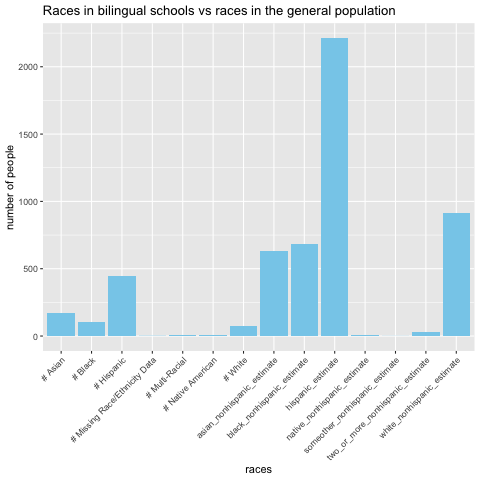

In [43]:
%%R

library(ggplot2)

# Given data
data <- tribble(
  ~variable,                            ~mean, ~median,   ~min,   ~max,      ~sd,
  "# Asian",                           174.,     23,       0,  2583,  317.,
  "# Black",                           105.,     64,       0,  1131,  143.,
  "# Hispanic",                        448.,    365,      11,  2056,  343.,
  "# Missing Race/Ethnicity Data",       2.18,     0,       0,   115,   10.5,
  "# Multi-Racial",                      4.82,     2,       0,    95,    8.92,
  "# Native American",                   6.21,     3,       0,   144,   13.7,
  "# White",                            75.1,     18,       0,  1645,  185.,
  "asian_nonhispanic_estimate",        633.,    244,       0,  6047,  979.,
  "black_nonhispanic_estimate",        680.,    338,       0,  4027,  807.,
  "hispanic_estimate",                2213.,   1816,       0, 11581, 2035.,
  "native_nonhispanic_estimate",        11.2,     0,       0,   400,   44.4,
  "someother_nonhispanic_estimate",      1.06,     0,       0,   140,    8.06,
  "two_or_more_nonhispanic_estimate",   32.9,     7,       0,   731,   64.5,
  "white_nonhispanic_estimate",        913.,    585,       0,  6214, 1113.
)

# Create ggplot
ggplot(data, aes(x = variable, y = mean)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "Races in bilingual schools vs races in the general population",
       x = "races",
       y = "number of people")


In [44]:
# code for plot 2
# make sure to make a meaningful title and subtitle

In [45]:
# code for plot 3
# make sure to make a meaningful title and subtitle

### Discrete Variables

If there are any discrete variables you'd like to analyze, you can do that with charts here.

In [46]:
# code for plot 1
# make sure to make a meaningful title and subtitle

In [47]:
# code for plot 2
# make sure to make a meaningful title and subtitle

In [48]:
# code for plot 3
# make sure to make a meaningful title and subtitle